In [175]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression Model challenge

First, I set up the working environment. Next, I imported my data, making sure to capture the correct column names and leave out extranious rows. Then I took my first look at the data.

In [176]:
data = ('/Users/Beba/Documents/JupyterNotebooks/NY2013Crimes.csv')
raw_crimes = pd.read_csv(data, skiprows=4)
raw_crimes.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


## The next step is to do some data cleaning, rearranging and scaling.

In [5]:
Property_Crime = pd.DataFrame()

In [6]:
Property_Crime['City'] = raw_crimes['City']
Property_Crime['Population'] = raw_crimes['Population']
Property_Crime['Robbery'] = raw_crimes['Robbery']
Property_Crime['Murder'] = raw_crimes['Murder and\nnonnegligent\nmanslaughter']

In [7]:
Property_Crime['Population'] = Property_Crime['Population'].str.replace(',','').astype(float)

In [8]:
Property_Crime['PopulationSQ'] = Property_Crime['Population'].apply(lambda x: x*x)

In [13]:
Property_Crime.head()

,City,Population,Robbery,Murder,PopulationSQ
0,Adams Village,1861.0,0,0.0,3.463321e+06
1,Addison Town and Village,2577.0,0,0.0,6.640929e+06
2,Akron Village,2846.0,0,0.0,8.099716e+06
3,Albany,97956.0,227,8.0,9.595378e+09
4,Albion Village,6388.0,4,0.0,4.080654e+07


In [58]:
Property_Crime['Robbery'] = Property_Crime['Robbery'].astype(str)

In [261]:
Property_Crime['Robbery_Category'] = np.where((Property_Crime['Robbery'] == 0.0), 0, 1)

In [68]:
Property_Crime['Murder'] = Property_Crime['Murder'].astype(str)
Property_Crime['Murder_Category'] = np.where(Property_Crime['Murder'].str.contains("0.0"), 0, 1)

In [72]:
Property_Crime.drop(['Robbery'], axis=1, inplace=True)
Property_Crime.drop(['Murder'], axis=1, inplace=True)

In [76]:
Property_Crime.describe()

,Population,PopulationSQ,Robbery_Category,Murder_Category
count,3.480000e+02,3.480000e+02,351.000000,351.000000
mean,4.003763e+04,2.035547e+11,0.575499,0.145299
std,4.500374e+05,3.778876e+12,0.494973,0.352905
min,5.260000e+02,2.766760e+05,0.000000,0.000000
25%,3.003000e+03,9.018117e+06,0.000000,0.000000
50%,7.233500e+03,5.232568e+07,1.000000,0.000000
75%,1.842750e+04,3.397536e+08,1.000000,0.000000
max,8.396126e+06,7.049493e+13,1.000000,1.000000


In [114]:
#Property_Crime['Population'] = raw_crimes['Population']
#Property_Crime['Population'] = Property_Crime['Population'].astype(float)
#Property_Crime['PopulationSQ'] = Property_Crime['Population'].apply(lambda x: x*x)
raw_crimes.isnull().sum()

City                                        0
Population                                  0
Violent\ncrime                              0
Murder and\nnonnegligent\nmanslaughter      0
Rape\n(revised\ndefinition)1              348
Rape\n(legacy\ndefinition)2                 0
Robbery                                     0
Aggravated\nassault                         0
Property\ncrime                             0
Burglary                                    0
Larceny-\ntheft                             0
Motor\nvehicle\ntheft                       0
Arson3                                    161
dtype: int64

In [109]:
Property_Crime.dropna(subset = ['Population', 'PopulationSQ'], inplace=True)

In [179]:
raw_crimes.dropna(subset = ['Property\ncrime',
                            'Population',
                            'Violent\ncrime',
                            'Robbery',
                            'Aggravated\nassault'], inplace=True)

In [199]:
regr = linear_model.LinearRegression()

In [192]:
Y = raw_crimes['Property\ncrime'].values.reshape(-1, 1)
X = Property_Crime['Population'].values.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.35)


In [190]:
raw_crimes['Property\ncrime'] = raw_crimes['Property\ncrime'].astype(float)

In [197]:
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)
Y_train_minmax = min_max_scaler.fit_transform(Y_train)
Y_test_minmax = min_max_scaler.transform(Y_test)

## Next up is the actual regression!

In [203]:
# the actual regression

regr.fit(X_train_minmax, Y_train_minmax)


print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test_minmax, Y_test_minmax))

Coefficients: 
 [[ 0.67780331]]
Intercept: 
 [-0.00938326]
0.113177244624


In [122]:
Property_Crime['Robbery'] = raw_crimes['Robbery'].str.replace(',','').astype(float)

In [123]:
Property_Crime['Violent_Crime'] = raw_crimes['Violent\ncrime'].str.replace(',','').astype(float)

Population alone only seems to account for 11% of the variance in our model. Let's try some different features.

In [204]:
X3 = Property_Crime[['Population', 'Murder', 'Rape', 'Assault']]
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X3, Y, test_size=.35)

X_train_minmax3 = min_max_scaler.fit_transform(X_train3)
X_test_minmax3 = min_max_scaler.transform(X_test3)
Y_train_minmax3 = min_max_scaler.fit_transform(Y_train3)
Y_test_minmax3 = min_max_scaler.transform(Y_test3)

regr.fit(X_train_minmax3, Y_train_minmax3)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test_minmax3, Y_test_minmax3))


Coefficients: 
 [[ 0.54413717  0.13946844  0.53073963 -0.21450447]]
Intercept: 
 [ 0.00049404]
0.950128885772


This set of features seems to explain a huge amount of variance in our data. 

In [147]:
Property_Crime['Murder'] = raw_crimes['Murder and\nnonnegligent\nmanslaughter']
Property_Crime['Rape'] = raw_crimes['Rape\n(legacy\ndefinition)2'].str.replace(',','').astype(float)
Property_Crime['Assault'] = raw_crimes['Aggravated\nassault'].str.replace(',','').astype(float)
Property_Crime['Burglary'] = raw_crimes['Burglary'].str.replace(',','').astype(float)
Property_Crime['Larceny'] = raw_crimes['Larceny-\ntheft'].str.replace(',','').astype(float)
Property_Crime['Motor_vehicle_theft'] = raw_crimes['Motor\nvehicle\ntheft'].str.replace(',','').astype(float)

Add new columns for new features, to test in the model. And maybe split it up into different sized cities and see if that affects it.

In [256]:
Property_Crime['Small_City'] = np.where((Property_Crime['Population'] < 100000), 1, 0)
Property_Crime['Medium_City'] = np.where(((Property_Crime['Population'] >= 100000) & (Property_Crime['Population'] < 1000000)), 1, 0)
Property_Crime['Big_City'] = np.where((Property_Crime['Population'] >= 1000000), 1, 0)

In [268]:
Property_Crime.head()

,City,Population,PopulationSQ,Robbery_Category,Murder_Category,Robbery,Violent_Crime,Murder,Rape,Assault,Burglary,Larceny,Motor_vehicle_theft,Small_City,Medium_City,Big_City
0,Adams Village,1861.0,3.463321e+06,0,0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,0.0,1,0,0
1,Addison Town and Village,2577.0,6.640929e+06,0,0,0.0,3.0,0.0,0.0,3.0,3.0,20.0,1.0,1,0,0
2,Akron Village,2846.0,8.099716e+06,0,0,0.0,3.0,0.0,0.0,3.0,1.0,15.0,0.0,1,0,0
3,Albany,97956.0,9.595378e+09,1,1,227.0,791.0,8.0,30.0,526.0,705.0,3243.0,142.0,1,0,0
4,Albion Village,6388.0,4.080654e+07,1,0,4.0,23.0,0.0,3.0,16.0,53.0,165.0,5.0,1,0,0


In [231]:
X4 = Property_Crime[['Population', 'Small_City', 'Murder', 'Rape']]
X_train4, X_test4, Y_train4, Y_test4 = train_test_split(X4, Y, test_size=.35)

X_train_minmax4 = min_max_scaler.fit_transform(X_train4)
X_test_minmax4 = min_max_scaler.transform(X_test4)
Y_train_minmax4 = min_max_scaler.fit_transform(Y_train4)
Y_test_minmax4 = min_max_scaler.transform(Y_test4)

regr.fit(X_train_minmax4, Y_train_minmax4)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print(regr.score(X_test_minmax4, Y_test_minmax4))


Coefficients: 
 [[ 0.45925495  0.00119685  0.04907988  0.49060003]]
Intercept: 
 [ 0.00015373]
0.938932421558


In [242]:
Y_pred = regr.fit(X_train_minmax4, Y_train_minmax4).predict(X_train_minmax4)


In [278]:
Small_City_Crime = Property_Crime[Property_Crime['Small_City'] == 1]

In [274]:
Medium_City_Crime = Property_Crime[Property_Crime['Medium_City'] == 1]

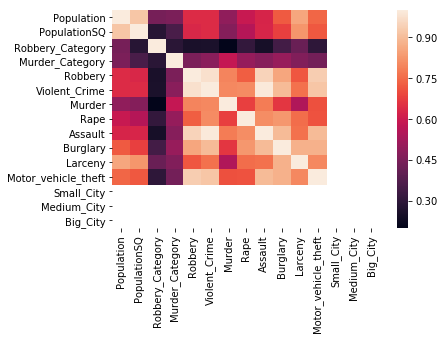

In [279]:
sns.heatmap(Small_City_Crime.corr())

This model seems to explain a good amount of variance as well. That's a satisfactory R-squared value. Time to check our assumptions.

## Linear Relationship

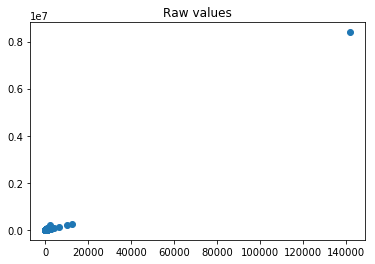

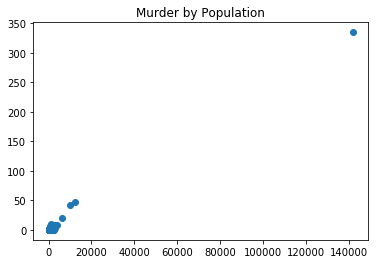

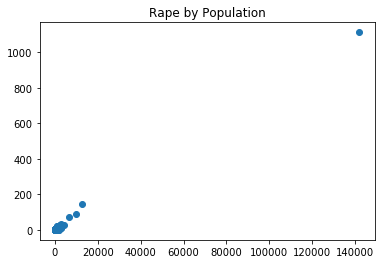

In [220]:
plt.scatter(Y, X)
plt.title('Raw values')
plt.show()

plt.scatter(Y, Property_Crime['Murder'])
plt.title('Murder by Population')
plt.show()

plt.scatter(Y, Property_Crime['Rape'])
plt.title('Rape by Population')
plt.show()

## Next lets see what the residuals look like

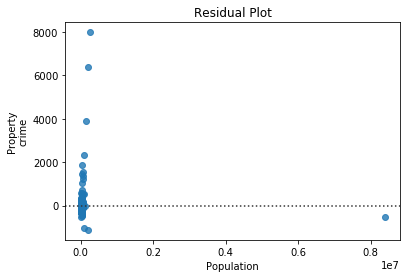

In [227]:
sns.residplot(x='Population', y=raw_crimes['Property\ncrime'], data=Property_Crime)
plt.title('Residual Plot')
plt.show()

In [266]:
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std